In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/CVD_cleaned.csv")

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='str')

### Target Variable

In [5]:
heart_disease_yes = len(df[df["Heart_Disease"] == "Yes"])
heart_disease_no = len(df[df["Heart_Disease"] == "No"])
heart_disease_yes_pct = round((heart_disease_yes/len(df))*100,2)
heart_disease_no_pct = round((heart_disease_no/len(df))*100,2)
print(f"The number of people having heart disease is {heart_disease_yes} and constitute {heart_disease_yes_pct} of the data")
print(f"The number of people not having heart disease is {heart_disease_no} and constitute {heart_disease_no_pct} of the data")

The number of people having heart disease is 24971 and constitute 8.09 of the data
The number of people not having heart disease is 283883 and constitute 91.91 of the data


* The data is 8.09% positive and 91.91% negative
* This indicates severe class imbalance

### Numerical Features investigation

In [6]:
numerical_cols = ['Height_(cm)','Weight_(kg)','BMI','Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Alcohol_Consumption']
stats = df[numerical_cols].describe().T
median = df[numerical_cols].median()
skew = df[numerical_cols].skew()
stats["median"] = df[numerical_cols].median()
stats["skew"] = skew
stats


,count,mean,std,min,25%,50%,75%,max,median,skew
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00,170.00,0.015311
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02,81.65,1.058204
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33,27.44,1.376619
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00,30.00,1.248428
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00,12.00,2.415608
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00,4.00,4.912350
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00,1.00,1.885622


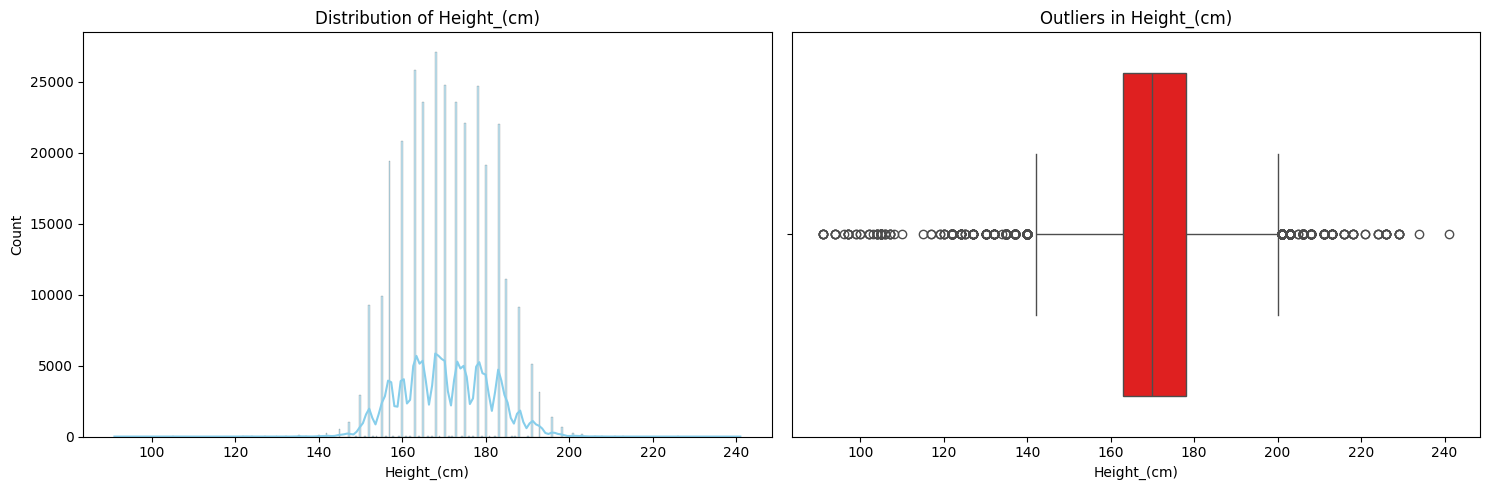

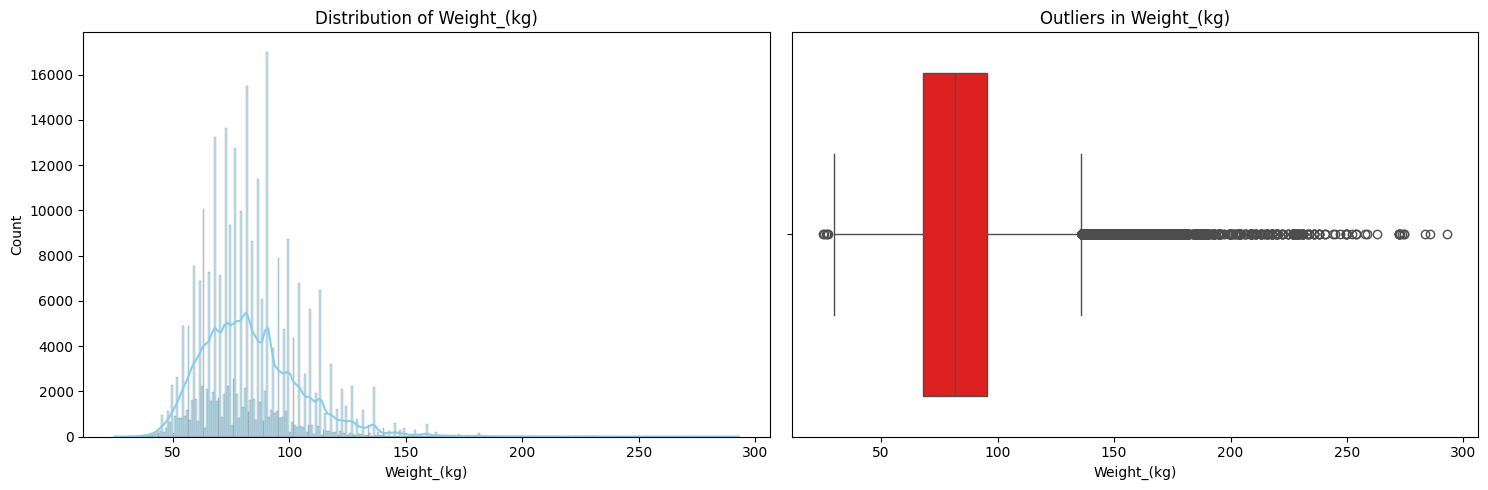

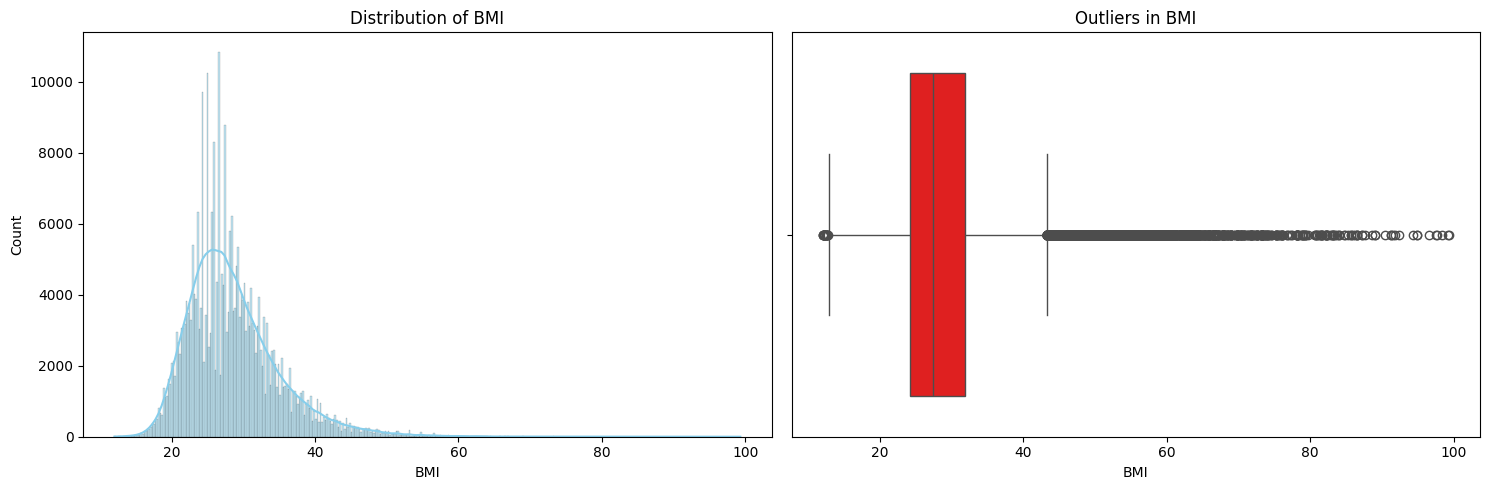

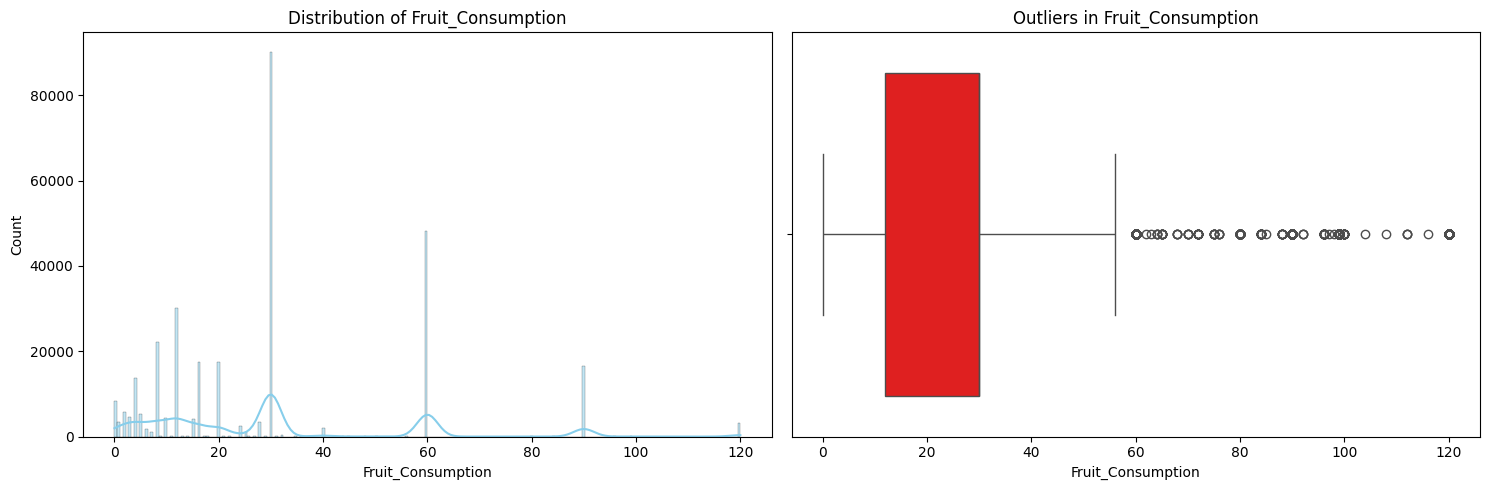

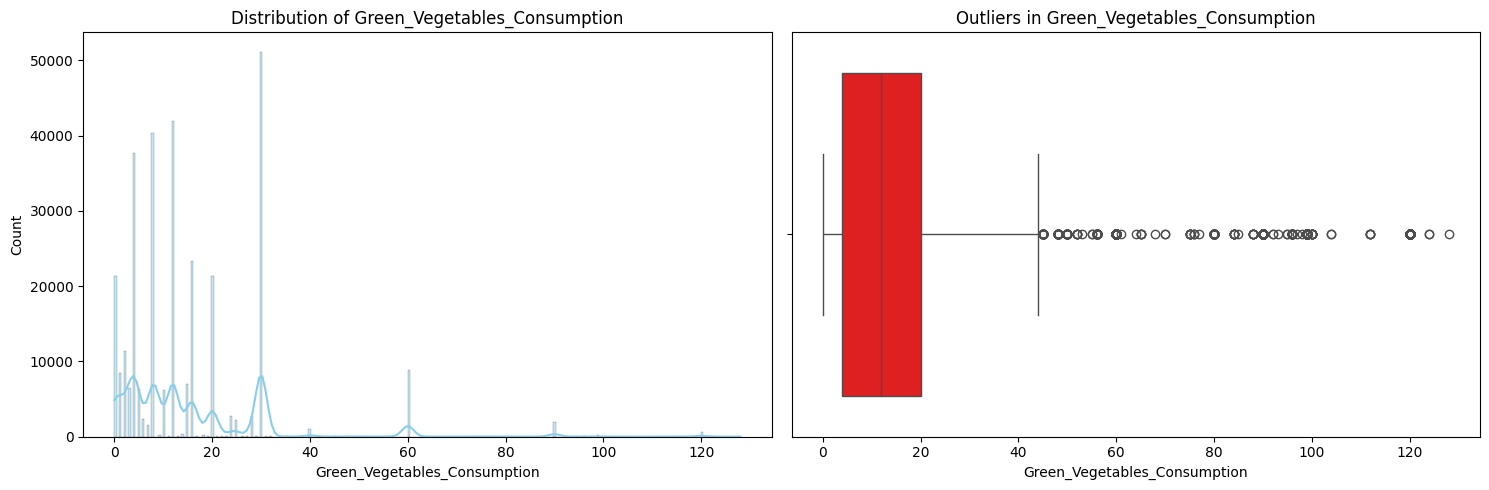

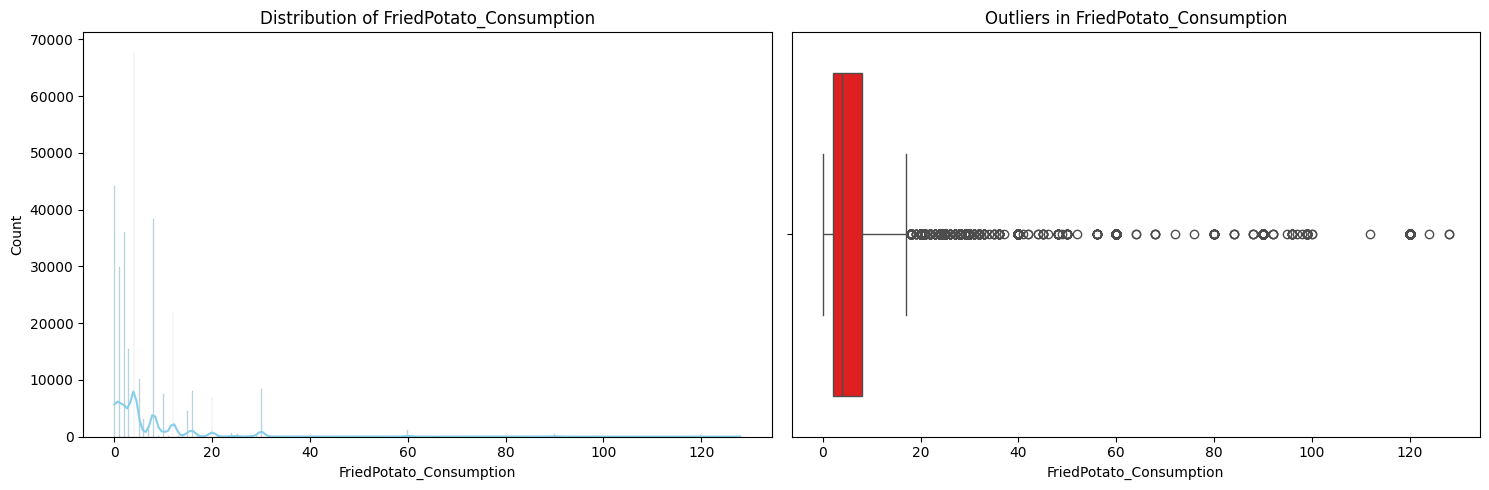

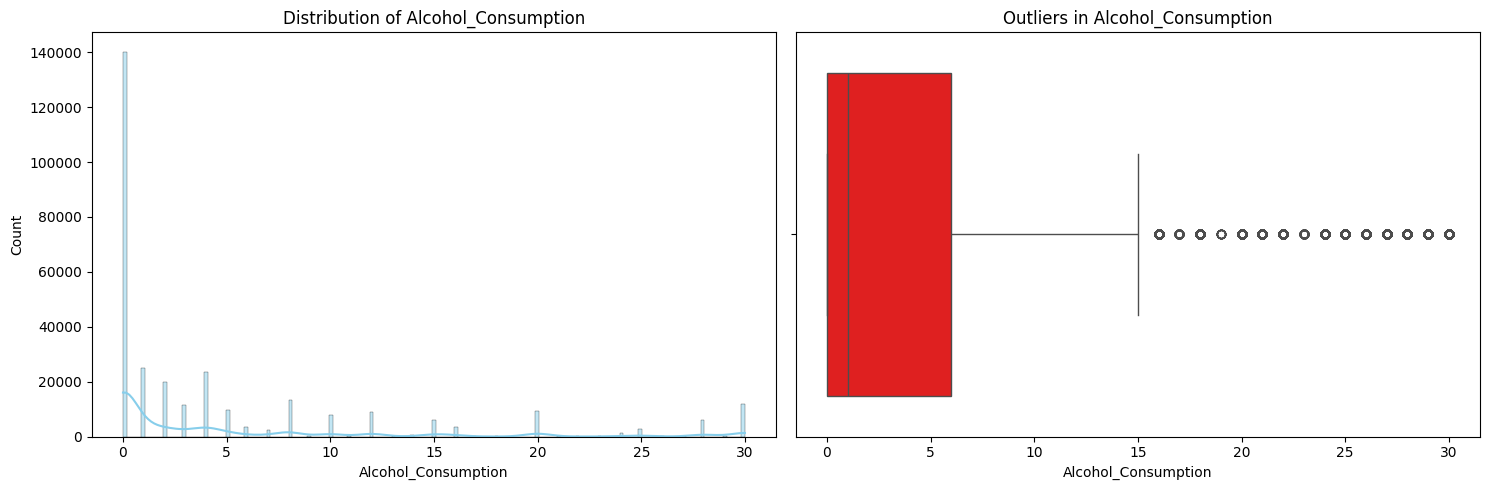

In [7]:
for col in numerical_cols:
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(data=df,x=col,kde=True,ax=axes[0],color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    sns.boxplot(data=df,x=col,ax=axes[1],color='red')
    axes[1].set_title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()

Height (cm)
* Distribution is approximately normal, centered around 160–175 cm.
* Extreme values below 120 cm and above 210 cm are observed and will be handled during cleaning.

Weight (kg)
* Distribution is right-skewed, with most values between 50–100 kg.
* Very high and very low values appear as outliers and will be reviewed in the cleaning stage.

BMI
* BMI is positively skewed, with most values between 18–35.
* Extreme BMI values above 60 are present and may require correction.

Fruit Consumption
* Distribution is right-skewed, with most individuals reporting low to moderate intake.
* High-end values appear as outliers but may represent genuine consumption behavior.

Green Vegetable Consumption
* Majority of individuals report moderate intake levels.
* Some extreme values are visible and will be assessed further if necessary.

Fried Potato Consumption
* Highly right-skewed, with most individuals consuming at low frequency.
* A small number of high-consumption outliers are present.

Alcohol Consumption
* Most individuals report low or no alcohol intake.
* High consumption values appear as outliers and may represent high-risk behavior.

### Investigating height, weight and BMI

In [8]:
body_stats = ["Height_(cm)","Weight_(kg)","BMI"]
stats = df[body_stats].describe().T
median = df[body_stats].median()
skew = df[body_stats].skew()
stats["median"] = df[body_stats].median()
stats["skew"] = skew
stats

,count,mean,std,min,25%,50%,75%,max,median,skew
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00,170.00,0.015311
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02,81.65,1.058204
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33,27.44,1.376619


In [9]:
bmi_greater_60 = len(df[(df["BMI"] > 60) | (df["BMI"]<15)])
weight_greater_200 = len(df[df["Weight_(kg)"] > 220])
height_extreme = len(df[(df["Height_(cm)"] > 210) | (df["Height_(cm)"] < 120)])
total_extremes = bmi_greater_60 + weight_greater_200 + height_extreme
total_extremes_pct = round((total_extremes/len(df))*100,2)
print(f"There are {total_extremes} extreme data and they constitute around {total_extremes_pct}% of the data")

There are 1037 extreme data and they constitute around 0.34% of the data


* Height = 91cm - 241cm
* Weight = 25kg - 293kg
* BMI = 12 - 99

### Investigating Alcohol, Fruit, Green Vegetables and Fried Potato Consumption

In [10]:
df[["Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption"]].describe()


,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000
mean,5.096366,29.835200,15.110441,6.296616
std,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,4.000000,2.000000
50%,1.000000,30.000000,12.000000,4.000000
75%,6.000000,30.000000,20.000000,8.000000
max,30.000000,120.000000,128.000000,128.000000


In [11]:
bins_alcohol = [-1, 0, 3, 10,31]
labels_alcohol = ["Non-Drinkers", "Light (1-3/month)", "Moderate (4-10/month)","Frequent (>10/month)"]
bins_food = [-1,0,8,15,30,60,130]
labels_food = ["None","Rare (<1/week)", "Weekly", "Almost Daily","Daily","Multiple per day"]
df["Alcohol_Level"] = pd.cut(df["Alcohol_Consumption"],bins=bins_alcohol,labels=labels_alcohol)
df["Fruit_Level"] = pd.cut(df["Fruit_Consumption"],bins=bins_food, labels=labels_food)
df["Green_Vegetable_Level"] = pd.cut(df["Green_Vegetables_Consumption"],bins=bins_food, labels=labels_food)
df["FriedPotato_Level"] = pd.cut(df["FriedPotato_Consumption"],bins=bins_food,labels=labels_food)

Alcohol Level Distribution:
Alcohol_Level
Non-Drinkers             140262
Light (1-3/month)         56202
Moderate (4-10/month)     60637
Frequent (>10/month)      51753
Name: count, dtype: int64


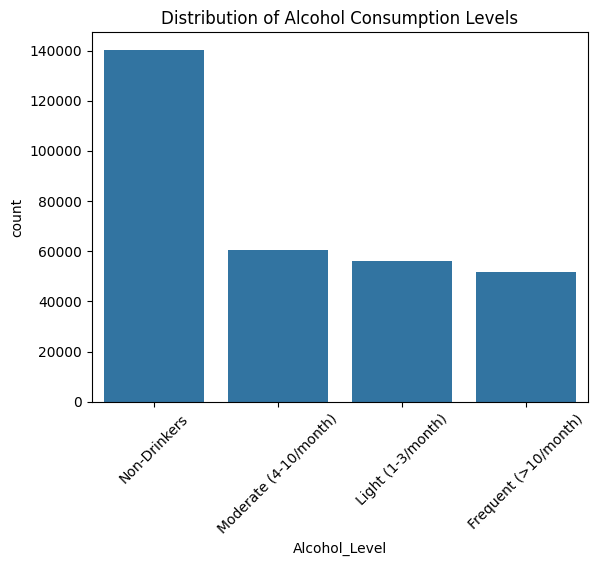

In [12]:
print("Alcohol Level Distribution:")
print(df["Alcohol_Level"].value_counts().sort_index())

plt.figure()
sns.countplot(x="Alcohol_Level", data=df, order=df["Alcohol_Level"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Alcohol Consumption Levels")
plt.show()


* Majority of individuals fall in the low or moderate consumption categories.
* Very few individuals are in the high or extreme categories, indicating right-skewed behavioral distribution.

Fruit Level Distribution:
Fruit_Level
None                  8333
Rare (<1/week)       57621
Weekly               39190
Almost Daily        132506
Daily                51106
Multiple per day     20098
Name: count, dtype: int64


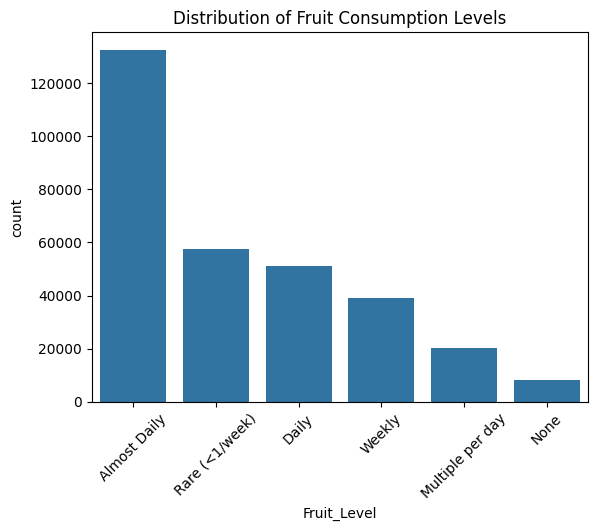

In [13]:
print("Fruit Level Distribution:")
print(df["Fruit_Level"].value_counts().sort_index())
plt.figure()
sns.countplot(x="Fruit_Level", data=df, order=df["Fruit_Level"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Fruit Consumption Levels")
plt.show()

* Fruit consumption is concentrated in the moderate-to-high frequency categories, particularly “Almost Daily.”
* The distribution shows imbalance across categories, with very low representation in the “None” group.

Green Vegetable Level Distribution:
Green_Vegetable_Level
None                 21389
Rare (<1/week)      114406
Weekly               55843
Almost Daily        104194
Daily                10126
Multiple per day      2896
Name: count, dtype: int64


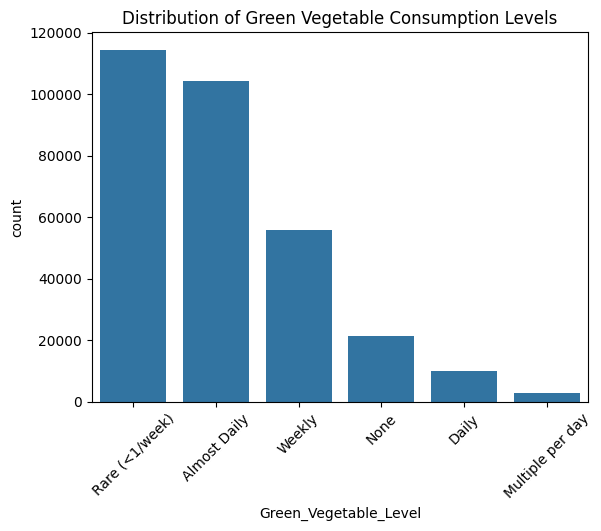

In [15]:
print("Green Vegetable Level Distribution:")
print(df["Green_Vegetable_Level"].value_counts().sort_index())

plt.figure()
sns.countplot(x="Green_Vegetable_Level", data=df, order=df["Green_Vegetable_Level"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Green Vegetable Consumption Levels")
plt.show()

Green Vegetable Consumption Levels
* Most individuals fall under “Rare (<1/week)” and “Almost Daily” categories, indicating varied but generally moderate intake patterns.
* Very few individuals consume vegetables multiple times per day, showing that extreme intake levels are uncommon.

Fried Potato Level Distribution:
FriedPotato_Level
None                 44233
Rare (<1/week)      202533
Weekly               34545
Almost Daily         25313
Daily                 1467
Multiple per day       763
Name: count, dtype: int64


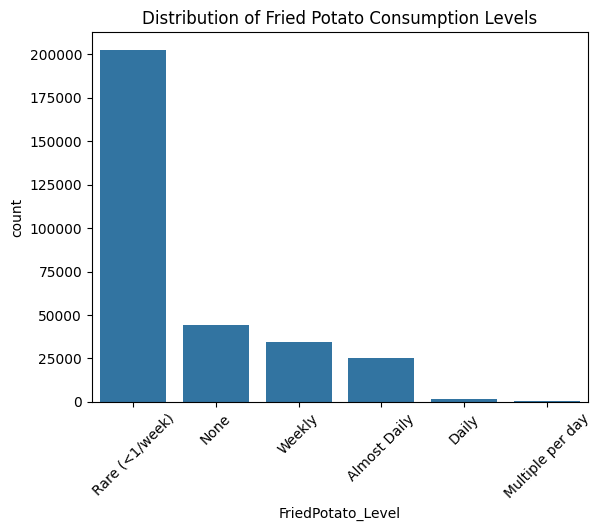

In [16]:
print("Fried Potato Level Distribution:")
print(df["FriedPotato_Level"].value_counts().sort_index())

plt.figure()
sns.countplot(x="FriedPotato_Level", data=df, order=df["FriedPotato_Level"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Fried Potato Consumption Levels")
plt.show()

Fried Potato Consumption Levels
* The majority of individuals report “Rare (<1/week)” consumption, indicating low fried potato intake for most participants.
* Daily or multiple-times-per-day consumption is relatively rare, but still present, representing potential high-risk dietary behavior.